<a href="https://colab.research.google.com/github/LeonardoMafra/Python_Data_Science/blob/main/NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Libraries para estudar sobre normalização de textos

# https://www.nltk.org/
# https://spacy.io/

In [ ]:
!pip install ydata_profiling

In [41]:
from google import colab as cl
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import re
import numpy as np

In [9]:
file_upload = cl.files.upload()

Saving B2W-Reviews01.csv to B2W-Reviews01.csv


In [10]:
dt = pd.read_csv('B2W-Reviews01.csv')

<ipython-input-10-9655d9ecec15>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  dt = pd.read_csv('B2W-Reviews01.csv')


In [11]:
dt.head()

,submission_date,reviewer_id,product_id,product_name,product_brand,site_category_lv1,site_category_lv2,review_title,overall_rating,recommend_to_a_friend,review_text,reviewer_birth_year,reviewer_gender,reviewer_state
0,2018-01-01 00:11:28,d0fb1ca69422530334178f5c8624aa7a99da47907c44de...,132532965,Notebook Asus Vivobook Max X541NA-GO472T Intel...,NaN,Informática,Notebook,Bom,4,Yes,Estou contente com a compra entrega rápida o ú...,1958.0,F,RJ
1,2018-01-01 00:13:48,014d6dc5a10aed1ff1e6f349fb2b059a2d3de511c7538a...,22562178,Copo Acrílico Com Canudo 500ml Rocie,NaN,Utilidades Domésticas,"Copos, Taças e Canecas","Preço imbatível, ótima qualidade",4,Yes,"Por apenas R$1994.20,eu consegui comprar esse ...",1996.0,M,SC
2,2018-01-01 00:26:02,44f2c8edd93471926fff601274b8b2b5c4824e386ae4f2...,113022329,Panela de Pressão Elétrica Philips Walita Dail...,philips walita,Eletroportáteis,Panela Elétrica,ATENDE TODAS AS EXPECTATIVA.,4,Yes,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,1984.0,M,SP
3,2018-01-01 00:35:54,ce741665c1764ab2d77539e18d0e4f66dde6213c9f0863...,113851581,Betoneira Columbus - Roma Brinquedos,roma jensen,Brinquedos,Veículos de Brinquedo,presente mais que desejado,4,Yes,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,1985.0,F,SP
4,2018-01-01 01:00:28,7d7b6b18dda804a897359276cef0ca252f9932bf4b5c8e...,131788803,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",lg,TV e Home Theater,TV,"Sem duvidas, excelente",5,Yes,"A entrega foi no prazo, as americanas estão de...",1994.0,M,MG


In [12]:
# gerando vizualização

profile = ProfileReport(dt, title  = 'avaliacoes_americanas')

In [13]:
profile.to_file('americanas.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:23<00:00,  1.70s/it]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
dt.columns

Index(['submission_date', 'reviewer_id', 'product_id', 'product_name',
       'product_brand', 'site_category_lv1', 'site_category_lv2',
       'review_title', 'overall_rating', 'recommend_to_a_friend',
       'review_text', 'reviewer_birth_year', 'reviewer_gender',
       'reviewer_state'],
      dtype='object')

In [15]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132373 entries, 0 to 132372
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        132373 non-null  object 
 1   reviewer_id            132373 non-null  object 
 2   product_id             132373 non-null  object 
 3   product_name           132289 non-null  object 
 4   product_brand          40982 non-null   object 
 5   site_category_lv1      132367 non-null  object 
 6   site_category_lv2      128360 non-null  object 
 7   review_title           132071 non-null  object 
 8   overall_rating         132373 non-null  int64  
 9   recommend_to_a_friend  132355 non-null  object 
 10  review_text            129098 non-null  object 
 11  reviewer_birth_year    126389 non-null  float64
 12  reviewer_gender        128237 non-null  object 
 13  reviewer_state         128382 non-null  object 
dtypes: float64(1), int64(1), object(12)


In [16]:
dt[['product_name','site_category_lv1','review_text','recommend_to_a_friend']]

,product_name,site_category_lv1,review_text,recommend_to_a_friend
0,Notebook Asus Vivobook Max X541NA-GO472T Intel...,Informática,Estou contente com a compra entrega rápida o ú...,Yes
1,Copo Acrílico Com Canudo 500ml Rocie,Utilidades Domésticas,"Por apenas R$1994.20,eu consegui comprar esse ...",Yes
2,Panela de Pressão Elétrica Philips Walita Dail...,Eletroportáteis,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...,Yes
3,Betoneira Columbus - Roma Brinquedos,Brinquedos,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...,Yes
4,"Smart TV LED 43"" LG 43UJ6525 Ultra HD 4K com C...",TV e Home Theater,"A entrega foi no prazo, as americanas estão de...",Yes
...,...,...,...,...
132368,Carregador De Pilha Sony + 4 Pilhas Aa 2500mah,Câmeras e Filmadoras,"Vale muito, estou usando no controle do Xbox e...",Yes
132369,Mop Giratório Fit + Refil Extra - At Home,Utilidades Domésticas,"Prático e barato, super indico o produto para ...",Yes
132370,Fita Led 5m Rgb 3528 Siliconada Com 300 Leds C...,Automotivo,Chegou antes do prazo previsto e corresponde a...,Yes
132371,Etiquetas Jurídicas Vade Mecum - Marca Fácil,Papelaria,"Material fraco, poderia ser melhor. Ficou deve...",No


In [17]:
# numeros de avaliacoes nulas

print(f'Avaliações Nulas: {dt["review_text"].isnull().sum()}')

Avaliações Nulas: 3275


In [18]:
#avaliações duplicadas

print(f'Avaliações Nulas: {dt.duplicated(keep=False).sum()}')

Avaliações Nulas: 1907


In [19]:
#remover valores duplicados

dt = dt.drop_duplicates().reset_index(drop=True)

In [20]:
# removendo valores nulos apenas das colunas

dt = dt.dropna(subset=[
    'review_text',
    'overall_rating',
    'recommend_to_a_friend'
])

In [21]:
# numeros de avaliacoes nulas apos a limpeza

print(f'Avaliações Nulas: {dt["review_text"].isnull().sum()}')

Avaliações Nulas: 0


In [22]:
#avaliações duplicadas apos a limpeza

print(f'Avaliações Nulas: {dt.duplicated(keep=False).sum()}')

Avaliações Nulas: 0


In [23]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 128208 entries, 0 to 131417
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   submission_date        128208 non-null  object 
 1   reviewer_id            128208 non-null  object 
 2   product_id             128208 non-null  object 
 3   product_name           128148 non-null  object 
 4   product_brand          40040 non-null   object 
 5   site_category_lv1      128202 non-null  object 
 6   site_category_lv2      124361 non-null  object 
 7   review_title           127982 non-null  object 
 8   overall_rating         128208 non-null  int64  
 9   recommend_to_a_friend  128208 non-null  object 
 10  review_text            128208 non-null  object 
 11  reviewer_birth_year    122479 non-null  float64
 12  reviewer_gender        124260 non-null  object 
 13  reviewer_state         124401 non-null  object 
dtypes: float64(1), int64(1), object(12)
memor

In [24]:
# contar ocorrencias de cada valor na coluna 'dados'

contagem = dt['overall_rating'].value_counts()

In [25]:
# calcular o total de observaçoes

total_observacoes = contagem.sum()


In [26]:
# calcular  a porcentagem para cada valor

percentuais = (contagem / total_observacoes) * 100

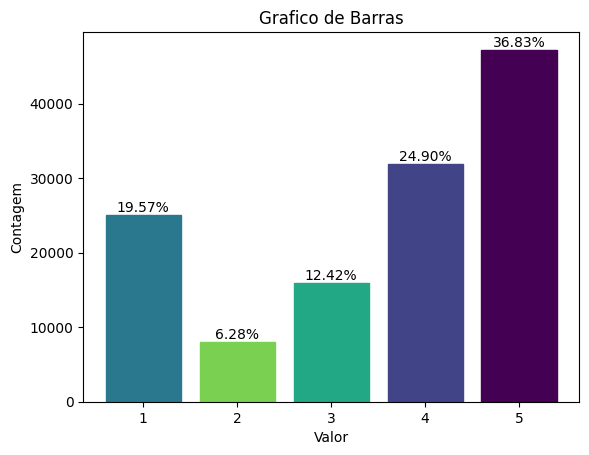

In [27]:
# criar graficos de barras

bars = plt.bar(contagem.index,
               contagem.values, color = 'skyblue')

#adicionar a quantidade em percentual na barra

for bar,percentual in zip(bars,percentuais):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height(),
  f'{percentual:.2f}%',
  ha= 'center', va= 'bottom')

# adicionar rotulos e titulos

plt.xlabel('Valor')
plt.ylabel('Contagem')
plt.title('Grafico de Barras')

# mudar cor entre as barras

for i in range(len(bars)):
  bars[i].set_color(plt.cm.viridis(i/len(bars)))

# mostrar grafico

plt.show()


In [28]:
# funcao para tratar sentimento das notas

def tratar_sentimento(nota):
  if nota in (3,4,5):
    return 1 # positivo
  else:
    return 0 # negativo


dt['sentimento'] = dt['overall_rating'].apply(tratar_sentimento)

dt[['overall_rating', 'sentimento']]

,overall_rating,sentimento
0,4,1
1,4,1
2,4,1
3,4,1
4,5,1
...,...,...
131413,5,1
131414,5,1
131415,4,1
131416,1,0


In [29]:
def tratar_sentimento(row):
  nota = row['overall_rating']
  amigo = row['recommend_to_a_friend']


  if amigo =='Yes':
    return 1
  elif (nota in (4,5)):
    return 1
  else:
    return 0

In [30]:
dt['sentimento'] = dt.apply(tratar_sentimento,axis=1)

In [32]:
dt.columns

Index(['submission_date', 'reviewer_id', 'product_id', 'product_name',
       'product_brand', 'site_category_lv1', 'site_category_lv2',
       'review_title', 'overall_rating', 'recommend_to_a_friend',
       'review_text', 'reviewer_birth_year', 'reviewer_gender',
       'reviewer_state', 'sentimento'],
      dtype='object')

In [33]:
# gerando exel
dt[['review_title', 'review_text', 'recommend_to_a_friend', 'overall_rating', 'sentimento']].to_excel('arquivo2.xlsx')

In [34]:
# veriicando dados positivos e negativos

dt[['reviewer_id','sentimento']].groupby('sentimento').count()

,reviewer_id
sentimento,
0,32224
1,95984


In [37]:
# funcao para pre-processar o texto

def preprocess_text(text):

  #convertendo para minusculos
  text = text.lower()

  #remover caracteres especiais, numero e pontuaoes

  text = re.sub('[^a-zA-Z\s]','', text)

  #remover espacos em branco extras

  text = re.sub(r'\s+',' ',text).strip()
  return text



In [38]:
#Pre-processar os textos

dt['review_text_t'] = dt['review_text'].apply(preprocess_text)
dt[['review_text_t', 'review_text']]

,review_text_t,review_text
0,estou contente com a compra entrega rpida o ni...,Estou contente com a compra entrega rápida o ú...
1,por apenas reu consegui comprar esse lindo cop...,"Por apenas R$1994.20,eu consegui comprar esse ..."
2,supera em agilidade e praticidade outras panel...,SUPERA EM AGILIDADE E PRATICIDADE OUTRAS PANEL...
3,meu filho amou parece de verdade com tantos de...,MEU FILHO AMOU! PARECE DE VERDADE COM TANTOS D...
4,a entrega foi no prazo as americanas esto de p...,"A entrega foi no prazo, as americanas estão de..."
...,...,...
131413,vale muito estou usando no controle do xbox e ...,"Vale muito, estou usando no controle do Xbox e..."
131414,prtico e barato super indico o produto para qu...,"Prático e barato, super indico o produto para ..."
131415,chegou antes do prazo previsto e corresponde a...,Chegou antes do prazo previsto e corresponde a...
131416,material fraco poderia ser melhor ficou devend...,"Material fraco, poderia ser melhor. Ficou deve..."


In [39]:
# dividindo os dados em treino e teste

x_train, x_test, y_train, y_test = train_test_split(dt['review_text_t'],
                                                    dt['sentimento'],
                                                    test_size=0.2,
                                                    random_state=42)

In [40]:
# criar o vetorizador TF-IDF

tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# ajustar e transformar os dados de treinamento

x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)

# treinar o classificador MultinomialNB

clf = MultinomialNB()
clf.fit(x_train_tfidf, y_train)

#Transformar os dados de teste

x_test_tfidf = tfidf_vectorizer.transform(x_test)

# fazer previsoes

y_pred = clf.predict(x_test_tfidf)

#avaliar modelo

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      6410
           1       0.91      0.94      0.92     19232

    accuracy                           0.89     25642
   macro avg       0.86      0.83      0.84     25642
weighted avg       0.88      0.89      0.88     25642



In [42]:
import re
import numpy as np

# Função para pré-processar o texto
def previsao_produto(text):
  # Pré-processar o texto avulso
  texto_avulso_preprocessado = preprocess_text(text)

  # Transformar o texto avulso usando o vetorizador TF-IDF treinado
  texto_avulso_tfidf = tfidf_vectorizer.transform([texto_avulso_preprocessado])

  # Fazer a previsão
  probabilidade_predicao = clf.predict_proba(texto_avulso_tfidf)
  predicao = clf.predict(texto_avulso_tfidf)

  # Mapear a previsão para a categoria correspondente
  sentimento_predito = "positivo" if predicao[0] == 1 else "negativo"

  print(f"Texto: '{texto_avulso}'")
  print(f"Sentimento predito: {sentimento_predito}")
  print(f"Probabilidade de ser positivo: {probabilidade_predicao[0][1]}")
  print(f"Probabilidade de ser negativo: {probabilidade_predicao[0][0]}")

In [56]:
# texto avulso para teste

texto_avulso = 'nao recomendo esse produto, muito ruim'

previsao_produto(texto_avulso)

Texto: 'nao recomendo esse produto, muito ruim'
Sentimento predito: negativo
Probabilidade de ser positivo: 0.48805376512673787
Probabilidade de ser negativo: 0.5119462348732626
